
| Stat Category       | Point Value               |
|---------------------|---------------------------|
|Rushing Yards        | 1 point for every 10 yards|
|Rushing TDs          | 6 points                  |
|Receiving Yards      | 1 point for every 10 yards|
|Receiving TDs        | 6 points                  |
|Fumbles Lost         | -2 points                 |



In [1]:
%matplotlib inline

import pandas as pd
import matplotlib as mp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

rb_games = pd.read_csv('rb_games.csv')
rb_games.columns.values

array(['Name', 'Year', 'Career Year', 'Game Count', 'Career Games', 'Date',
       'Team', 'Opp', 'Result', 'Rush Att', 'Rush Yds', 'Rush Avg',
       'Rush Lg', 'Rush TD', 'Rush FD', 'Rec Rec', 'Rec Yds', 'Rec Avg',
       'Rec Lg', 'Rec TD', 'Rec FD', 'Rec Tar', 'Rec YAC'], dtype=object)

In [2]:
rb_games['Fantasy Points'] = ((rb_games['Rush Yds'] + rb_games['Rec Yds']) / 10) + ((rb_games['Rush TD'] + rb_games['Rec TD']) *6)
rb_fantasy = rb_games[['Name','Career Year', 'Year', 'Game Count', 'Career Games', 'Date', 'Rec Rec', 'Rec Yds', 'Rec TD', 'Rush Att', 'Rush Yds', 'Rush TD', 'Fantasy Points']]

rb_fantasy.head(10)

,Name,Career Year,Year,Game Count,Career Games,Date,Rec Rec,Rec Yds,Rec TD,Rush Att,Rush Yds,Rush TD,Fantasy Points
0,"brown, aaron",1,2009,1,1,9/13/09,0,0,0,1,9,0,0.9
1,"brown, aaron",1,2009,2,2,9/20/09,1,3,0,4,10,0,1.3
2,"brown, aaron",1,2009,3,3,9/27/09,1,9,0,5,6,0,1.5
3,"brown, aaron",1,2009,4,4,10/4/09,1,14,0,1,3,0,1.7
4,"brown, aaron",1,2009,5,5,10/11/09,0,0,0,0,0,0,0.0
5,"brown, aaron",1,2009,6,6,10/18/09,0,0,0,2,13,0,1.3
6,"brown, aaron",1,2009,7,7,11/1/09,2,13,0,2,15,0,2.8
7,"brown, aaron",1,2009,8,8,11/8/09,0,0,0,4,27,0,2.7
8,"brown, aaron",1,2009,9,9,11/22/09,1,26,1,0,0,0,8.6
9,"brown, aaron",1,2009,10,10,11/26/09,0,0,0,1,5,0,0.5


/Users/jph/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


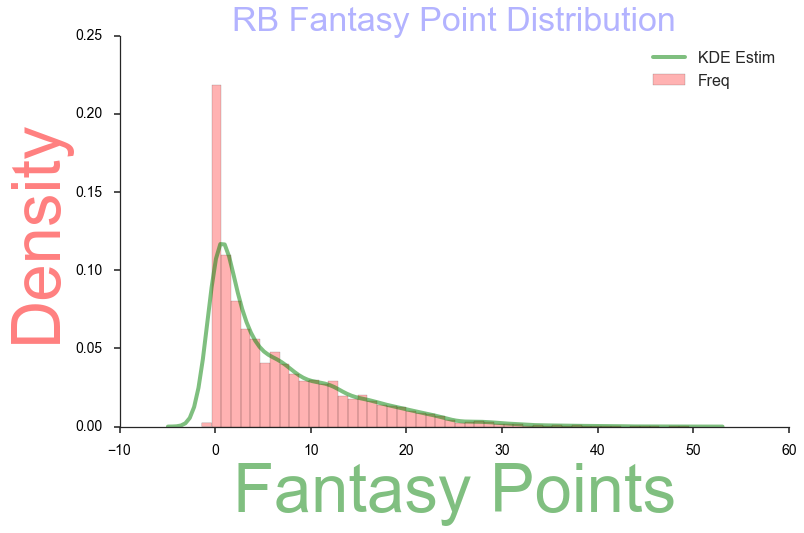

In [37]:
x = rb_fantasy['Fantasy Points']
sns.set_context('poster')
sns.set_style("ticks")

g=sns.distplot(x,
            kde_kws={"color":"g","lw":4,"label":"KDE Estim","alpha":0.5},
            hist_kws={"color":"r","alpha":0.3,"label":"Freq"})


# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(12,7)
# Set the Title of the graph from here
g.axes.set_title('RB Fantasy Point Distribution', fontsize=34,color="b",alpha=0.3)
# Set the xlabel of the graph from here
g.set_xlabel("Fantasy Points",size = 67,color="g",alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("Density",size = 67,color="r",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=14,labelcolor="black")

## Observation
Heavily skewed distribution where the fantasy points provided by running backs are generally near 0.  Initial thought is that this is due to generally perceived high volatility of running back careers and running backs who do not participate a great deal during a game. 

Shifting data to only include Fantasy Points when greater than 8 average rushing attempts


/Users/jph/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


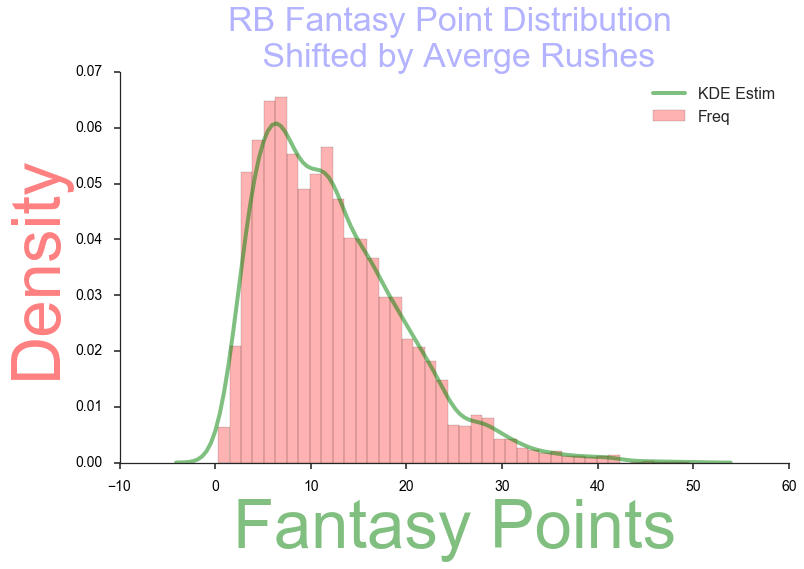

In [24]:
rush_att = rb_fantasy['Rush Att'].mean()
print('Shifting data to only include Fantasy Points when greater than %d average rushing attempts' %(rush_att))
rb_mid_level = rb_fantasy.loc[rb_fantasy['Rush Att'] > rush_att]
x = rb_mid_level['Fantasy Points']
sns.set_context('poster')
sns.set_style("ticks")

g=sns.distplot(x,
            kde_kws={"color":"g","lw":4,"label":"KDE Estim","alpha":0.5},
            hist_kws={"color":"r","alpha":0.3,"label":"Freq"})


# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(12,7)
# Set the Title of the graph from here
g.axes.set_title('RB Fantasy Point Distribution \n Shifted by Averge Rushes', fontsize=34,color="b",alpha=0.3)
# Set the xlabel of the graph from here
g.set_xlabel("Fantasy Points",size = 67,color="g",alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("Density",size = 67,color="r",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=14,labelcolor="black")

## Observation
By shifting the data allowed into the data set by only including data where the running back averaged running the football more than 8 times per game, the distribution of the data is less skewed.

Shifting data to only include Fantasy Points when greater than 16 average rushing attempts


/Users/jph/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


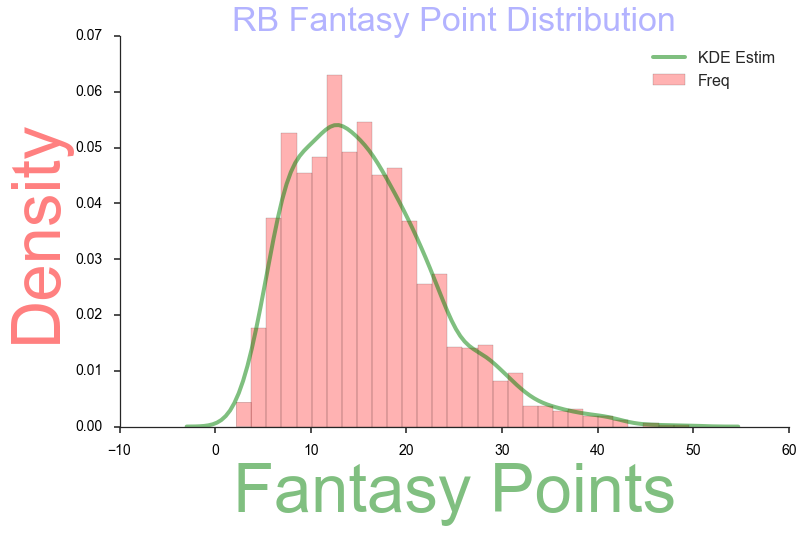

In [25]:
rush_att = rb_mid_level['Rush Att'].mean()
print('Shifting data to only include Fantasy Points when greater than %d average rushing attempts' %(rush_att))
rb_high_level = rb_mid_level.loc[rb_fantasy['Rush Att'] > rush_att]
x = rb_high_level['Fantasy Points']
sns.set_context('poster')
sns.set_style("ticks")

g=sns.distplot(x,
            kde_kws={"color":"g","lw":4,"label":"KDE Estim","alpha":0.5},
            hist_kws={"color":"r","alpha":0.3,"label":"Freq"})


# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(12,7)
# Set the Title of the graph from here
g.axes.set_title('RB Fantasy Point Distribution\n Shifted by Averge Rushes', fontsize=34,color="b",alpha=0.3)
# Set the xlabel of the graph from here
g.set_xlabel("Fantasy Points",size = 67,color="g",alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("Density",size = 67,color="r",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=14,labelcolor="black")

## Observation
By increasing the shift of data so that only data for running backs that averaged 16 or more rushing attempts, the data is more normalized.  The thought is that this is an indicator that very sparsely used players who would not generate many fantasy points are being eliminated and a truer view of what a running back can contribute is being seen.

Shifting data to only include Fantasy Points when greater than 21 average rushing attempts


/Users/jph/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


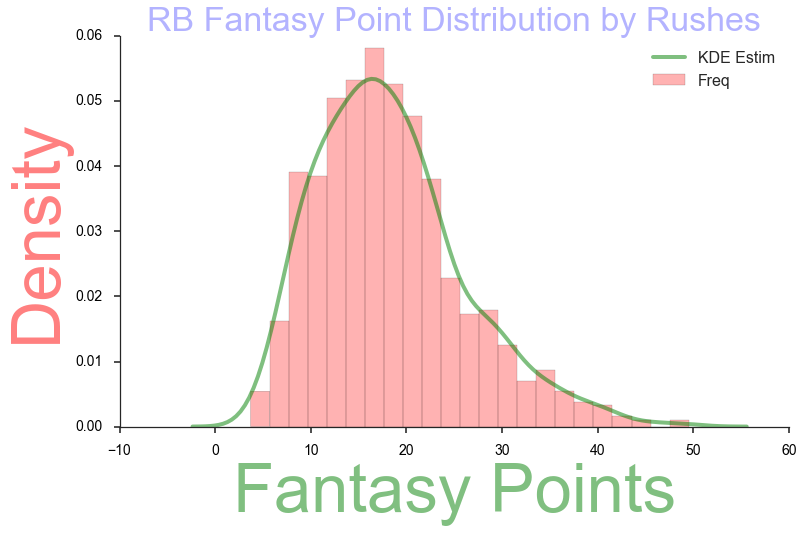

In [26]:
low_rush_att = rb_high_level['Rush Att'].mean()
print('Shifting data to only include Fantasy Points when greater than %d average rushing attempts' %(low_rush_att))

rb_higher_level = rb_high_level.loc[rb_fantasy['Rush Att'] > low_rush_att]
x = rb_higher_level['Fantasy Points']
sns.set_context('poster')
sns.set_style("ticks")

g=sns.distplot(x,
            kde_kws={"color":"g","lw":4,"label":"KDE Estim","alpha":0.5},
            hist_kws={"color":"r","alpha":0.3,"label":"Freq"})


# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(12,7)
# Set the Title of the graph from here
g.axes.set_title('RB Fantasy Point Distribution by Rushes\n Shifted by Averge Rushes', fontsize=34,color="b",alpha=0.3)
# Set the xlabel of the graph from here
g.set_xlabel("Fantasy Points",size = 67,color="g",alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("Density",size = 67,color="r",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=14,labelcolor="black")

## Observation
Again, filtering the data so that only fantasy points for running backs that averaged over 21 carries a game created an even more normalized distribution of data.  One data point to consider here is that averaging 21 carries a game for a 16 game season would result in 336 carries.  Anecdototally, carrying more than 300 per season is generally considered a warning flag that a player will have a shorter career. 

Shifting data to only include Fantasy Points when greater than 25 average rushing attempts


/Users/jph/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


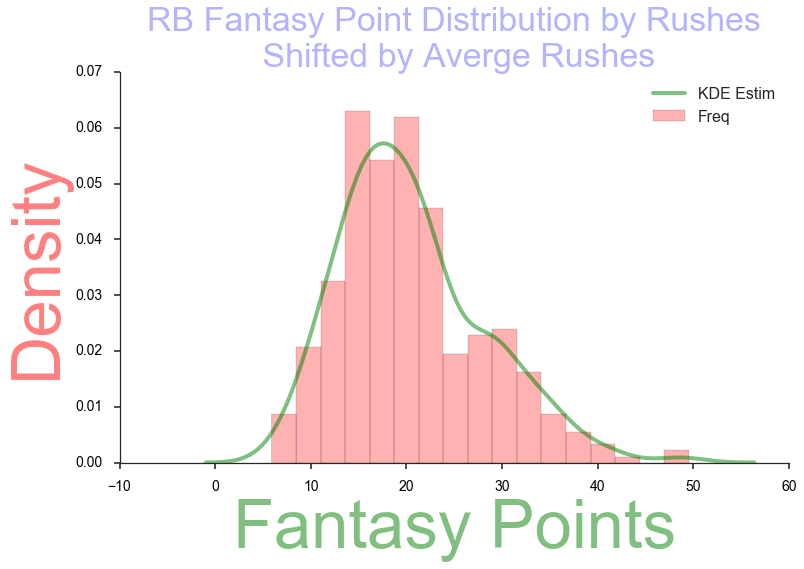

In [28]:
rush_att = rb_higher_level['Rush Att'].mean()
print('Shifting data to only include Fantasy Points when greater than %d average rushing attempts' %(rush_att))

rb_highest_level = rb_higher_level.loc[rb_fantasy['Rush Att'] > rush_att]
x = rb_highest_level['Fantasy Points']
sns.set_context('poster')
sns.set_style("ticks")

g=sns.distplot(x,
            kde_kws={"color":"g","lw":4,"label":"KDE Estim","alpha":0.5},
            hist_kws={"color":"r","alpha":0.3,"label":"Freq"})


# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(12,7)
# Set the Title of the graph from here
g.axes.set_title('RB Fantasy Point Distribution by Rushes\n Shifted by Averge Rushes', fontsize=34,color="b",alpha=0.3)
# Set the xlabel of the graph from here
g.set_xlabel("Fantasy Points",size = 67,color="g",alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("Density",size = 67,color="r",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=14,labelcolor="black")

## Observation
Now that the data is filtered to only include Fantasy Points for 25 carries per game.  There is an obvious shift in the skewing of data toward the higher end now.  25 rushes in a season would total 400 rushes for a year.  This is probably not a sustainable effort for a single player.   

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(len(rb_fantasy))
yearly_fantasy_points = rb_fantasy.groupby(['Career Year'], as_index=False).mean()
yearly_fantasy_points[['Career Year', 'Rush Att', 'Rush Yds', 'Rush TD', 'Rec Yds', 'Rec TD', 'Fantasy Points']]


10622


,Career Year,Rush Att,Rush Yds,Rush TD,Rec Yds,Rec TD,Fantasy Points
0,1,7.107090,30.528804,0.197194,9.698671,0.028804,5.378730
1,2,8.240349,36.453300,0.237235,11.278331,0.038605,6.428207
2,3,8.127700,35.944727,0.260483,12.945997,0.055909,6.787421
3,4,8.825934,37.777308,0.270613,12.790698,0.059197,7.035659
4,5,9.536885,39.741803,0.274590,11.824590,0.048361,7.094344
5,6,9.060633,39.702262,0.281448,11.962896,0.066968,7.257014
6,7,8.834152,36.476658,0.253071,11.904177,0.066339,6.754545
7,8,9.498233,41.045936,0.250883,12.678445,0.061837,7.248763
8,9,8.340471,33.051392,0.286938,7.781585,0.027837,5.971949
9,10,7.462687,30.220149,0.223881,8.962687,0.041045,5.507836


# Data Analysis by year

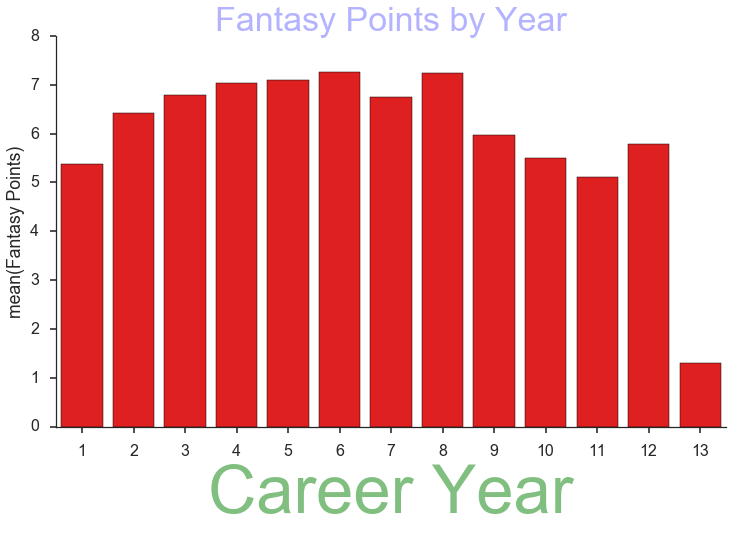

In [29]:
color = ['red']
ax = sns.barplot(x=yearly_fantasy_points['Career Year'], y=yearly_fantasy_points['Fantasy Points'],  palette=color)
sns.despine()
# Set the size of the graph from here
ax.figure.set_size_inches(12,7)
ax.axes.set_title('Fantasy Points by Year', 
    fontsize=34,color="b",alpha=0.3)
ax.set_xlabel("Career Year",size = 67,color="g",alpha=0.5)
g.set_ylabel("Fantasy Points",size = 67,color="r",alpha=0.5)
g.tick_params(labelsize=14,labelcolor="black")

## Observation
An unfiltered view of fantasy points by year for a running back show them to be far less important than quarterbacks in terms of the fantasy points they can generate.  This does show a trend of improvement over the first 6 years of a career, following by a 3 year plateau and then a decline in points after that.  The sharpest increase in performance is between years 1 and 2.

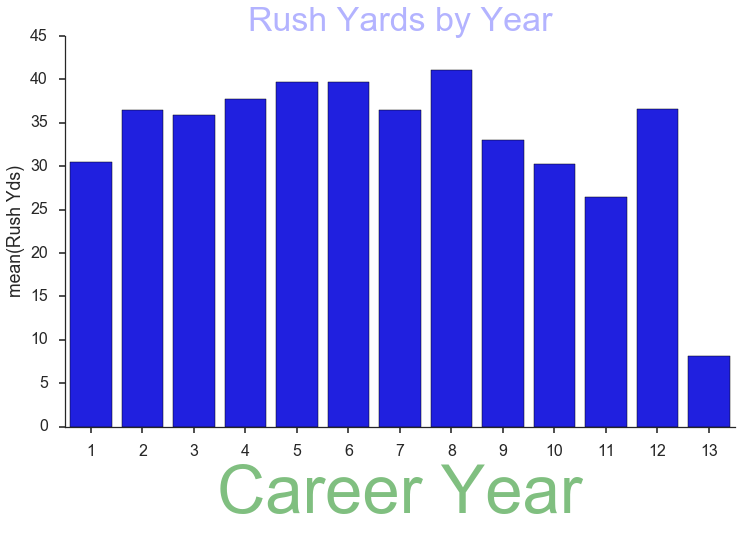

In [35]:
color = ['blue']
ax = sns.barplot(x=yearly_fantasy_points['Career Year'], y=yearly_fantasy_points['Rush Yds'],  palette=color)
sns.despine()
# Set the size of the graph from here
ax.figure.set_size_inches(12,7)
ax.axes.set_title('Rush Yards by Year', 
    fontsize=34,color="b",alpha=0.3)
ax.set_xlabel("Career Year",size = 67,color="g",alpha=0.5)
g.set_ylabel("Rush Yds",size = 67,color="r",alpha=0.5)
g.tick_params(labelsize=14,labelcolor="black")



## Observation
Similar to Fantasy Point production, the sharpest increase in rushing yardage happens during the between the first and second year.  After that there is a slight to year 6, a bit of a plateau between years 6 and 8, and then a sharp decrease after 8 years with an anomoly in year 12.  Need to investigate to see if this is an outlier performer as opposed to a general trend.

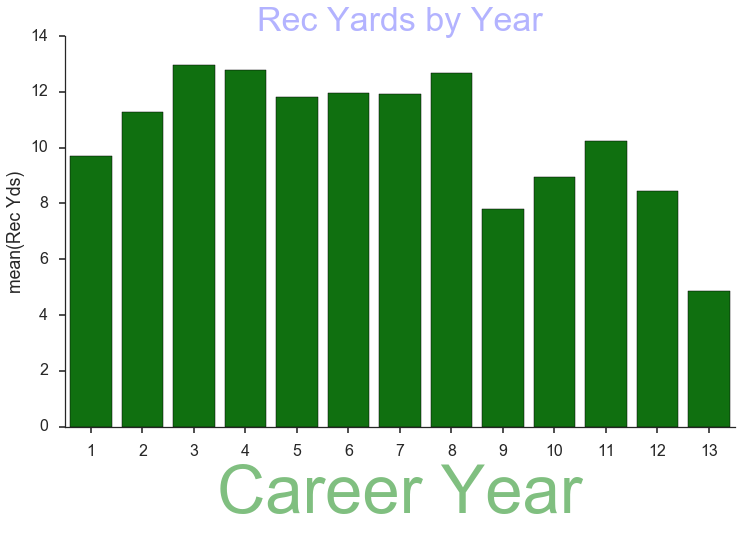

In [39]:
color = ['Green']

ax = sns.barplot(x=yearly_fantasy_points['Career Year'], y=yearly_fantasy_points['Rec Yds'],  palette=color)
sns.despine()
# Set the size of the graph from here
ax.figure.set_size_inches(12,7)
ax.axes.set_title('Rec Yards by Year', 
    fontsize=34,color="b",alpha=0.3)
ax.set_xlabel("Career Year",size = 67,color="g",alpha=0.5)
g.set_ylabel("Rec Yds",size = 67,color="r",alpha=0.5)
g.tick_params(labelsize=14,labelcolor="black")



## Observation
The number of yards generated by running backs by receiving the football are not necessarily significant, but there are a couple interesting traits.  The initial growth period extends from year 1 through 3, which is longer than rushing increases, aand the plateau period seems to be years 3 through 8.  After a steep decline after year 8, there is almost a bit of a secondary growth period.  This might be interesting when coupled with the general decline in rushing yardage after year 8.